## Hits table
Get the hit rate from the input file sequences to the output tsv file of hits

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Useful function for displaying more data
def display_all(df):
    with pd.option_context("display.max_columns", 1000):
        display(df)

In [2]:
#Insert the outformat
outformat = "qseqid qlen sseqid sallseqid slen qstart qend sstart send qseq full_qseq sseq full_sseq evalue bitscore score length pident nident mismatch positive gapopen gaps ppos qframe btop cigar staxids sscinames sskingdoms skingdoms sphylums stitle salltitles qcovhsp scovhsp qtitle qqual full_qqual qstrand"

#Insert the title of the table
title = "Contracaecum osculatum - Hits Table"

#Filename
filename = 'contracaecum_osculatum'

In [5]:
# Insert the databases names 
db_names = [
    'NR',
    'TrEMBL',
    'Swiss-prot',
]

# Insert the columns names
column_names = [
    'Number of BLASTX results',
    'Number of BLASTP results',
]

#Insert the names (or path) of the fasta files
infile = [
    './cc_corset_longest_orfs.cds',
    './cc_corset_longest_orfs.pep',
]

#Insert the names (or path) of the tsv files (must be ordered by table's columns)
outfiles = [
    ['./cds_nr.tsv','./pep_nr.tsv'],
    ['./cds_tr.tsv','./pep_tr.tsv'],
    ['./cds_sp.tsv','./pep_sp.tsv'],
]

def get_id_from_fasta(name):
    id_set = set()

    with open(name, 'r') as f:
        for line in f.readlines():
            if line.startswith('>'):
                id_set.add(line.split(' ')[0][1:])
    return list(id_set)


In [6]:
table_data = [['Database'] + [x for x in column_names]]

for out in range(len(outfiles)):
    tmp = [db_names[out]]
    for file in range(len(outfiles[out])):
        df = pd.read_csv(outfiles[out][file], sep="\t", names=outformat.split())
        infile_id_count = get_id_from_fasta(infile[file])

        hits  = len(df['qseqid'].unique())
        total = len(infile_id_count)

        perc = hits / total * 100

        tmp.append(str(hits) + ' (' + str(round(perc, 1)) + ' %)')
        del df

    table_data.append(tmp)



In [7]:
table_data

[['Database', 'Number of BLASTX results', 'Number of BLASTP results'],
 ['NR', '29694 (80.3 %)', '24366 (65.9 %)'],
 ['TrEMBL', '29904 (80.9 %)', '24600 (66.5 %)'],
 ['Swiss-prot', '20660 (55.9 %)', '17239 (46.6 %)']]

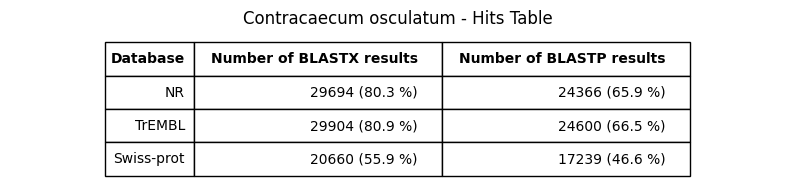

In [8]:
plt.rcParams["figure.figsize"] = (10,2)
fig, ax = plt.subplots()

table = ax.table(cellText=table_data, loc='center')

table.set_fontsize(34)
table.scale(1, 2)
table.auto_set_column_width(col=list(range(len(table_data[0]))))
ax.set_title(title)
from matplotlib.font_manager import FontProperties

for (row, col), cell in table.get_celld().items():
  if (row == 0) or (col == -1):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
ax.axis('off')
plt.savefig(filename + '_hits_table.png', bbox_inches = 'tight', dpi=300)
plt.show()